<a href="https://colab.research.google.com/github/davidislip/SVM-and-MVO/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integration of SVM and MVO 

This notebook computes and visualizes the results of the computational experiments

In [448]:
!sudo python -m pip install gurobipy==9.1.2
import gurobipy as gp
from gurobipy import GRB
from google.colab import drive 
from pandas.tseries.offsets import MonthEnd, Day, MonthBegin
import math
import time
drive.mount('/content/gdrive')
pth = 'gdrive/My Drive/Colab Notebooks/'
import sys
sys.path.append(pth + 'SVM MVO/PYFILES/')
from packages import *
#from svm_mvo import *
%matplotlib inline


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
try:
  e = gp.Env(empty=True)
  #e.setParam('OutputFlag', 0)
  gurobi_licence = pd.read_csv(pth +'SVM MVO/DATA/gurobi.csv')
  e.setParam('WLSACCESSID', gurobi_licence.WLSACCESSID[0])
  e.setParam('LICENSEID', gurobi_licence.LICENSEID[0])
  e.setParam('WLSSECRET', gurobi_licence.WLSSECRET[0])
  e.start()
except: 
  !chmod 755 /content/gdrive/My\ Drive/Colab\ Notebooks/SVM\ MVO/gurobi/grbgetkey
  !/content/gdrive/My\ Drive/Colab\ Notebooks/SVM\ MVO/gurobi/grbgetkey 2d15bcec-464e-11ec-8a74-0242ac120003
  e = gp.Env(empty=True)
  #chmod 755 grbgetkey
  e.start()

  %run /content/gdrive/My\ Drive/Colab\ Notebooks/SVM\ MVO/PYFILES/svm_mvo.py

Changed value of parameter WLSACCESSID
Changed value of parameter LICENSEID
Changed value of parameter WLSSECRET

--------------------------------------------
--------------------------------------------

info  : grbgetkey version 9.1.2, build v9.1.1rc0-30-g8af970cb
info  : Contacting Gurobi license server...
info  : License file for license ID 726787 was successfully retrieved
info  : License expires at the end of the day on 2022-01-13
info  : Saving license file...

In which directory would you like to store the Gurobi license file?
[hit Enter to store it in /opt/gurobi]: 

info  : License 726787 written to file /opt/gurobi/gurobi.lic

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2022-01-13
Using license file /opt/gurobi/gurobi.lic
Changed value of parameter WLSACCESSID
Changed value of parameter LICENSEID
Changed value of parameter WLSSECRET

---------------------------------------

### Alternating Direction Method Effectiveness (Solution quality and time) for the full set of problems described in notebook ADM Comparison NoteBook Timing.ipynb

In [121]:
###import pickle files
import pickle
dpi_setting = 150
#single penalization parameter
with open("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/svm_adm_mvp_lrg_v3.pkl",'rb') as fp:
  (adm1_wgts, adm1_obj_inf, adm1_svm_wgts, adm1_z, adm1_xi) = pickle.load(fp)
#individual penalization parameter
with open("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/svm_adm2_mvp_lrg_v3.pkl",'rb') as fp:
  (adm2_wgts, adm2_obj_inf, adm2_svm_wgts, adm2_z, adm2_xi)  = pickle.load(fp)
#individual penalization parameter with random 
with open("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/svm_adm2_mvp_lrg_random.pkl",'rb') as fp:
  (rand_wgts, rand_obj_inf, rand_svm_wgts, rand_z, rand_xi)  = pickle.load(fp)
#SVM Exact
with open("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/svm_exact_mvp_lrg_v3.pkl",'rb') as fp:
  (exact_wgts, exact_obj_inf, exact_svm_wgts, exact_z, exact_xi) = pickle.load(fp)
wrds_svm = pd.read_pickle(pth + 'SVM MVO/DATA/WRDS_ASOF.pkl')
tics = list(exact_wgts.columns)
dates = exact_wgts.index
print("valid tickers:", tics)

valid tickers: ['AAPL', 'ABC', 'ABMD', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AJG', 'AKAM', 'ALB', 'ALK', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMT', 'AMZN', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ATO', 'AVY', 'AZO', 'BA', 'BAX', 'BBY', 'BDX', 'BKNG', 'BLL', 'BMY', 'BSX', 'BWA', 'CAG', 'CAH', 'CAT', 'CCI', 'CCL', 'CDNS', 'CERN', 'CHD', 'CHRW', 'CI', 'CL', 'CLX', 'CMCSA', 'CMI', 'CMS', 'CNP', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'CTXS', 'CVS', 'CVX', 'D', 'DD', 'DGX', 'DHR', 'DIS', 'DISH', 'DLTR', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'ES', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'F', 'FAST', 'FCX', 'FDX', 'FE', 'FFIV', 'FISV', 'FLS', 'FMC', 'GD', 'GIS', 'GLW', 'GPC', 'GPS', 'GWW', 'HAL', 'HAS', 'HD', 'HES', 'HFC', 'HOG', 'HOLX', 'HON', 'HP', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HSY', 'HUM', 'IBM', 'IDXX', 'IEX', 'IFF', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IRM', 

### Investigate Infeasibility of PADM methods

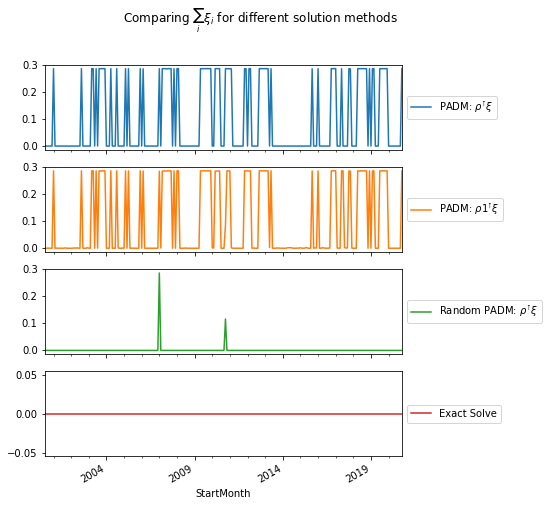

In [122]:
pd.DataFrame(np.array([adm2_xi.sum(axis=1), adm1_xi.sum(axis=1), rand_xi.sum(axis=1), exact_xi.sum(axis=1)]).transpose(), 
             columns = [r'PADM: $\rho^{\intercal} \xi$', r'PADM: $\rho 1^{\intercal}\xi$', r'Random PADM: $\rho^{\intercal} \xi$',  "Exact Solve"], 
             index = adm2_xi.sum(axis=1).index).plot(subplots = True, legend = False, title = r'Comparing $\sum_i \xi_i$ for different solution methods', figsize = (8,8))
for ax in plt.gcf().axes:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(pth+"SVM MVO/Images/p6.png",dpi = dpi_setting)

In [123]:
print("Number of instances where the multiple penalty formulation finished first: ", (adm2_obj_inf['Run-Time'] < adm1_obj_inf['Run-Time']).sum())
print("Number of instances: ", (adm2_obj_inf['Run-Time'] < adm1_obj_inf['Run-Time']).count())

Number of instances where the multiple penalty formulation finished first:  237
Number of instances:  244


In [131]:
adm_feasible = adm2_xi.sum(axis=1) < 10**(-9)
print("Number of instances where the PADM found an SVM feasible solution: ", sum(adm_feasible))
pd.DataFrame(adm_feasible.reset_index()[~adm_feasible.values])

Number of instances where the PADM found an SVM feasible solution:  162


,StartMonth,0
6,2001-01-01,False
25,2002-08-01,False
32,2003-03-01,False
33,2003-04-01,False
35,2003-06-01,False
...,...,...
230,2019-09-01,False
231,2019-10-01,False
232,2019-11-01,False
233,2019-12-01,False


In [7]:
rand_feasible = rand_xi.sum(axis=1) < 10**(-8)
print("Number of instances where the Randomized PADM found an SVM feasible solution: ", sum(rand_feasible))
pd.DataFrame(adm_feasible.reset_index()[~rand_feasible.values])

Number of instances where the Randomized PADM found an SVM feasible solution:  242


,StartMonth,0
78,2007-01-01,False
123,2010-10-01,False


### Solution Quality: MIP Gap for feasible instances by comparing $x^{\intercal} \Sigma x + \frac{1}{2} ||w||^2 $ for the exact solution method and the PADM approaches (random and deterministic)

PADM
Median MIP Gap:  6.334454669405052
95% MIP Gap:  74.25439154966841
70% MIP Gap:  12.604756570699827
5% MIP Gap:  0.48712752526842795
Random PADM
Median MIP Gap:  3.8611533171674934
95% MIP Gap:  88.86405028456755
70% MIP Gap:  10.304878601538627
5% MIP Gap:  0.37221612239988117


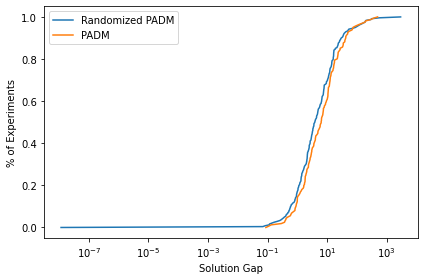

In [150]:
exact_obj = exact_obj_inf.Risk + 0.5*exact_obj_inf.Margin 
adm2_obj = adm2_obj_inf.Risk + 0.5*adm2_obj_inf.Margin 
rand_obj = rand_obj_inf.Risk + 0.5*rand_obj_inf.Margin 

def print_MIP(obj_inf, exact_obj_inf, feasible, Name = ""):
  exact_obj = exact_obj_inf.Risk + exact_obj_inf.Margin 
  obj = obj_inf.Risk + obj_inf.Margin 
  MIP_Gaps = (obj[feasible]/exact_obj[feasible] - 1)
  #MIP_Gaps.boxplot()
  #
  if Name != "":
    print(Name)
  print("Median MIP Gap: ", np.percentile(MIP_Gaps, 50))
  print("95% MIP Gap: ", np.percentile(MIP_Gaps, 95))
  print("70% MIP Gap: ", np.percentile(MIP_Gaps, 70))
  print("5% MIP Gap: ", np.percentile(MIP_Gaps, 5))
  return MIP_Gaps
adm_MIP = print_MIP(adm2_obj_inf, exact_obj_inf, adm_feasible, Name = "PADM")
rand_MIP = print_MIP(rand_obj_inf, exact_obj_inf, rand_feasible, Name = "Random PADM")

rand_prob = np.linspace(0,1, len(rand_MIP))
adm_prob = np.linspace(0,1, len(adm_MIP))


adm_dt_cdf = np.sort(adm_MIP)
rand_dt_cdf = np.sort(rand_MIP)
plt.plot(rand_dt_cdf, rand_prob, label = "Randomized PADM")
plt.plot(adm_dt_cdf, adm_prob, label = "PADM")
plt.xscale('log')
plt.legend()
# plt.title("Solution Gap CDF: Randomized vs Deterministic PADM")
plt.ylabel("% of Experiments")
plt.xlabel("Solution Gap")
plt.tight_layout()
plt.savefig(pth+"SVM MVO/Images/p8.png", dpi = dpi_setting)

In [179]:
sum(rand_dt_cdf < 0.1)

3

In [180]:
sum(adm_dt_cdf < 0.1)

1

In [147]:
rand_obj_inf.Margin

StartMonth
2000-07-01    0.006986
2000-08-01    0.001519
2000-09-01    0.013581
2000-10-01    0.007877
2000-11-01    0.000926
                ...   
2020-06-01    0.026610
2020-07-01    0.000898
2020-08-01    0.000475
2020-09-01    0.005399
2020-10-01    0.008210
Name: Margin, Length: 244, dtype: float64

In [143]:
exact_obj_inf.Margin 

StartMonth
2000-07-01    0.000257
2000-08-01    0.000294
2000-09-01    0.000524
2000-10-01    0.000429
2000-11-01    0.000197
                ...   
2020-06-01    0.000328
2020-07-01    0.000169
2020-08-01    0.000131
2020-09-01    0.000161
2020-10-01    0.000205
Name: Margin, Length: 244, dtype: float64

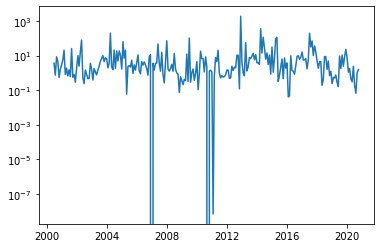

In [181]:
plt.plot((rand_obj - exact_obj)/exact_obj)
plt.yscale('log')

#### Metrics for Comparison

$$ \gamma_1 = \frac{1}{T} \sum_{t = 1} ^ T \frac{1}{N}||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_1$$

$$\gamma_2 =  \max_{t = 1 \in [T]} \frac{1}{N} ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_1$$

$$\gamma_3 =  \frac{1}{T} \sum_{t = 1} ^ T  ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_{\infty}$$

$$\gamma_4 =  \max_{t = 1 \in [T]} ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_{\infty}$$

$$\gamma_5 =   \frac{1}{T} \sum_{t = 1} ^ T Q_{95}(\{|x_t^{\text{ADM}} - x_t^{\text{Exact}}|_i \}_{i=1}^N)$$

In [182]:
gamma1 = 100*np.abs(adm2_wgts - exact_wgts).mean(axis = 1).mean() #average l1 norm 
gamma2 = 100*np.abs(adm2_wgts - exact_wgts).mean(axis = 1).max() #worst case l1 norm
gamma3 = 100*np.abs(adm2_wgts - exact_wgts).max(axis = 1).mean() #average worst case difference
gamma4 = 100*np.abs(adm2_wgts - exact_wgts).max(axis = 1).max() #worst case difference
gamma5 = 100*np.percentile(np.abs(adm2_wgts - exact_wgts), 95, axis = 1).mean() #worst case difference

pd.DataFrame([gamma1,gamma2,gamma3,gamma4], index = ["$\gamma_1$", "$\gamma_2$", "$gamma_3$", "$\gamma_4$"], columns = ["Solution Quality Metrics"]).transpose()

,$\gamma_1$,$\gamma_2$,$gamma_3$,$\gamma_4$
Solution Quality Metrics,0.272362,0.580722,11.355996,41.229305


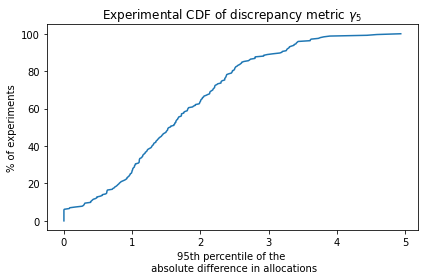

In [183]:
#raw_diffs = np.sort((adm_wgts - exact_wgts).values.flatten())
raw_diffs95 = np.sort(np.percentile(100*np.abs(adm2_wgts - exact_wgts), 95, axis = 1))
raw_diffs99 = np.sort(np.percentile(100*np.abs(adm2_wgts - exact_wgts), 99, axis = 1))
raw_diffs80 = np.sort(np.percentile(100*np.abs(adm2_wgts - exact_wgts), 80, axis = 1))
raw_diffs50 = np.sort(np.percentile(100*np.abs(adm2_wgts - exact_wgts), 50, axis = 1))

probs = np.linspace(0,1,len(raw_diffs95))
# plt.plot(probs, raw_diffs99)

plt.plot(raw_diffs95, 100*probs)
plt.title("Experimental CDF of discrepancy metric $\gamma_5$ ")
plt.ylabel("% of experiments")
plt.xlabel("95th percentile of the \n absolute difference in allocations");
plt.tight_layout()
#plt.plot(probs,raw_diffs80);
# plt.plot(probs,raw_diffs50)
# u = np.percentile(np.abs(raw_diffs), 95)
# print(u)

### Selection Accuracy
$1 - \frac{|z^{\text{PADM}} - z^{\text{exact}}|}{\sum_i z_i^{\text{PADM}} + z_i^{\text{exact}}}$
Reported for all instances

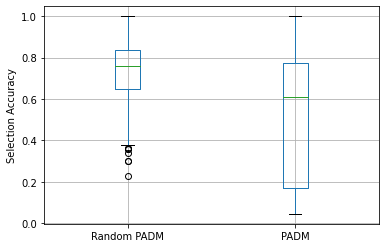

In [184]:
S_rand = 1 - np.abs(rand_z - exact_z).sum(axis=1)/(rand_z + exact_z).sum(axis=1)
S_adm = 1 - np.abs(adm2_z - exact_z).sum(axis=1)/(adm2_z + exact_z).sum(axis=1)

pd.DataFrame({'Random PADM': S_rand, 'PADM': S_adm}).boxplot();
plt.ylabel("Selection Accuracy");
plt.savefig(pth+"SVM MVO/Images/p9.png", dpi = dpi_setting)

In [189]:
print("Selection Accuracy: Median ", np.percentile(S_rand,50))
print("Selection Accuracy: Median ", np.percentile(S_adm,50))

S_adm

Selection Accuracy: Median  0.7600873870581435
Selection Accuracy: Median  0.6073688917222488


StartMonth
2000-07-01    0.771765
2000-08-01    0.913526
2000-09-01    0.829040
2000-10-01    0.979775
2000-11-01    0.961276
                ...   
2020-06-01    0.773481
2020-07-01    0.644258
2020-08-01    0.676218
2020-09-01    0.775385
2020-10-01    0.099585
Length: 244, dtype: float64

#### Timing 

Average time 

and run-time distributions

In [13]:
adm_ave_time = adm2_obj_inf['Run-Time'].mean()
rand_ave_time = rand_obj_inf['Run-Time'].mean()
exact_ave_time = exact_obj_inf['Run-Time'].mean()
print("Mean Time")
print("Exact: ", exact_ave_time)
print("PADM: ", adm_ave_time)
print("Randomized PADM: ", rand_ave_time)

adm_med_time = np.percentile(adm2_obj_inf['Run-Time'],50)
rand_med_time = np.percentile(rand_obj_inf['Run-Time'],50)
exact_med_time = np.percentile(exact_obj_inf['Run-Time'],50)
print("Median Time")
print("Exact: ", exact_med_time)
print("ADM: ", adm_med_time)
print("Randomized PADM: ", rand_med_time)

adm_med_time = np.percentile(adm2_obj_inf['Run-Time'],95)
rand_med_time = np.percentile(rand_obj_inf['Run-Time'],95)
exact_med_time = np.percentile(exact_obj_inf['Run-Time'],95)
print("95th Percentile Time")
print("Exact", exact_med_time)
print("ADM", adm_med_time)
print("Randomized PADM: ", rand_med_time)


Mean Time
Exact:  77.74823932960385
PADM:  26.960849779551147
Randomized PADM:  57.853854004476894
Median Time
Exact:  70.50486743450165
ADM:  28.294347405433655
Randomized PADM:  59.916078329086304
95th Percentile Time
Exact 172.1780617594719
ADM 39.535423278808594
Randomized PADM:  79.96445506811142


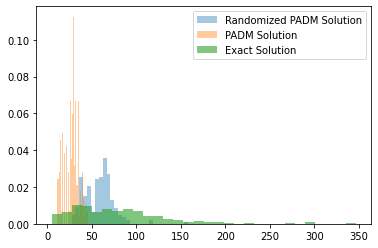

In [190]:
plt.hist(rand_obj_inf['Run-Time'], bins = 30, density = True, label = "Randomized PADM Solution", alpha = 0.4);
plt.hist(adm2_obj_inf['Run-Time'], bins = 30, density = True, label = "PADM Solution", alpha = 0.4);
plt.hist(exact_obj_inf['Run-Time'], bins = 30, density = True, label = "Exact Solution",alpha = 0.6);

plt.legend();

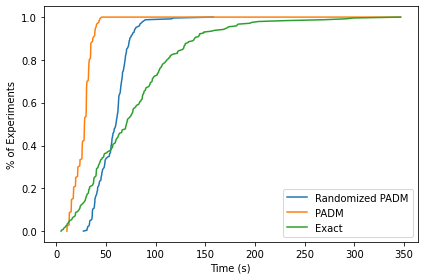

In [191]:
prob = np.linspace(0,1, len(exact_obj_inf['Run-Time']))
prob2 = np.zeros(len(prob)+1)
prob2[:len(prob)] = prob
prob2[-1] = 1

adm_dt_cdf = np.sort(np.array(adm2_obj_inf['Run-Time'].tolist()+[max(exact_obj_inf['Run-Time'])]))
rand_dt_cdf = np.sort(np.array(rand_obj_inf['Run-Time'].tolist()+[max(rand_obj_inf['Run-Time'])]))

exact_dt_cdf = np.sort(np.array(exact_obj_inf['Run-Time']))
plt.plot(rand_dt_cdf, prob2, label = "Randomized PADM")
plt.plot(adm_dt_cdf, prob2, label = "PADM")

plt.plot(exact_dt_cdf, prob, label = "Exact")

plt.legend()
#plt.title("Run-time CDF: ADM vs. Exact Solution")
plt.ylabel("% of Experiments")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.savefig(pth+"SVM MVO/Images/p10.png", dpi = dpi_setting)

### Performance Ratio Analysis
$\frac{t_i^{m}}{\text{min} \{t_i^a: a \in M \} }$ where $M = \{ \text{Random PADM},\  \text{ADM},\  \text{Exact}\}$

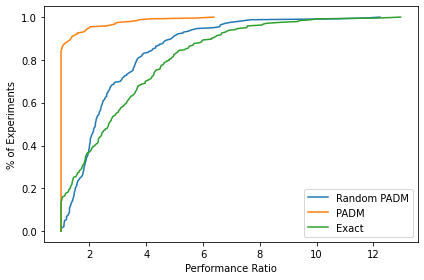

In [192]:
times = pd.DataFrame({"Random PADM" : rand_obj_inf['Run-Time'], "PADM":adm2_obj_inf['Run-Time'], 'Exact': exact_obj_inf['Run-Time']})
performance_ratio = times.divide(times.min(axis=1), axis=0 )
#performance_ratio.plot()
prob = np.linspace(0,1, len(performance_ratio))
plt.figure()
for col in performance_ratio.columns:
  cdf = performance_ratio[col].sort_values()
  plt.plot(cdf,prob, label = col)

plt.ylabel("% of Experiments")
plt.xlabel("Performance Ratio")
plt.legend()
plt.tight_layout()
plt.savefig(pth+"SVM MVO/Images/p11.png", dpi = dpi_setting)

### Wealth Experiments

* for a given turnover, read in the 3 configurations 

* generate cumulative wealth plots

* calculate sharpe ratios

* look at factors over time

### Biases 

The results here are biased because although the portfolios have turnover constraints they also do not consider transaction costs - for comparison purposes this is okay but for actually financial reporting this is not

Furthermore, the asset universe is has survivorship bias 

There is one less out of sample return because the estimates (based on past info) can be obtained but the realized returns cannot be obtained for the last available estimate. 

In [428]:
turnover = "0_75"
with open("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/card__oot_results__turnover"+turnover+"by6.pkl",'rb') as fp:
  mvo_results = pickle.load(fp)
# with open("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/svm_oot_results_turnover0_75by6.pkl", 'rb') as fp:
#   svm_results = pickle.load(fp)
with open("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/negvol_"+turnover+"by6.pkl", 'rb') as fp:
  svm_results = pickle.load(fp)
with open("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/oot_5_"+turnover+".pkl", 'rb') as fp:
  adm_results = pickle.load(fp)
  #risk free rate data
FF_RiskFree = pd.read_csv("gdrive/My Drive/Colab Notebooks/SVM MVO/DATA/F-F_Research_Data_Factors.CSV")
FF_RiskFree.Date = pd.to_datetime(FF_RiskFree['Date'], format='%Y%m', errors='coerce')
FF_RiskFree.index = FF_RiskFree.Date 
FF_RiskFree.drop(FF_RiskFree.columns[0:4], axis=1, inplace = True)

weights_mvo, oot_returns_mvo, market_mvo, wis_mvo, bias_mvo, soln_mods_mvo = mvo_results
weights_svm, oot_returns_svm, market_svm, wis_svm, bias_svm, soln_mods_svm = svm_results
weights_adm, oot_returns_adm, market_adm, wis_adm, bias_adm, soln_mods_adm, times = adm_results

In [429]:
## Import Monthly Returns
rets = pd.read_pickle(pth + 'SVM MVO/DATA/RETS.pkl')
## Import feature vectors
wrds_svm = pd.read_pickle(pth + 'SVM MVO/DATA/WRDS_ASOF.pkl')
## Import Daily Prices
Prices = pd.read_pickle(pth + 'SVM MVO/DATA/Daily_Prices.pkl')
## Get the trade dates
StockDates = wrds_svm.reset_index().loc[:, ['Date', 'MonthStart', 'MonthEnd']].drop_duplicates()

In [430]:
daily_rets = Prices.pct_change() + 1
new_index = daily_rets.index[0:-1] #VERY IMPORTANT
daily_rets.drop(daily_rets.head(1).index,inplace=True)
daily_rets.index = new_index
Prices['StartMonth'] = Prices.index + Day(1) + MonthBegin(-1) 

#this calculate the month of the stock returns 
daily_rets['StartMonth'] = daily_rets.index + Day(1) + MonthBegin(-1) 
# daily_rets[['AAPL', 'StartMonth']].head()
# daily_rets.dropna(inplace = True)
# daily_rets.head()

In [431]:
oot_returns_mvo = (weights_mvo.iloc[:-1]*rets).sum(axis = 1)
oot_returns_svm = (weights_svm.iloc[:-1]*rets).sum(axis = 1)
oot_returns_adm = (weights_adm.iloc[:-1]*rets).sum(axis = 1)
rf = FF_RiskFree[FF_RiskFree.index.isin(oot_returns_adm.index)]

In [432]:
# daily_portfolio = pd.merge(weights_mvo, daily_rets.reset_index()[['Date', 'StartMonth']], how='left', left_index = True, right_on = 'StartMonth')
# daily_portfolio.index = daily_portfolio.Date
#Rets.index.isin(StockDates.MonthStart.values)
(daily_rets).groupby('StartMonth').prod().iloc[8:].head() - 1

,AAPL,ABC,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AJG,AKAM,ALB,ALK,AMAT,AMD,AME,AMGN,AMT,AMZN,ANSS,AON,AOS,APA,APD,APH,ATO,AVY,AZO,BA,BAX,BBY,BDX,BKNG,BLL,BMY,BSX,BWA,...,SYK,SYY,T,TAP,TFX,TGT,TJX,TMO,TSCO,TSN,TT,TXN,TXT,UHS,UNH,UNP,URI,VFC,VLO,VMC,VRSN,VRTX,VZ,WAB,WAT,WBA,WDC,WEC,WHR,WM,WMB,WMT,WY,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBRA
StartMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-01,-0.075030,0.149590,0.194030,-0.043729,-0.105083,-0.184231,-0.018750,-0.034648,-0.424388,0.071684,0.109756,0.186170,0.166667,-0.436620,0.144928,0.023095,-0.194463,-0.195846,0.003126,0.007299,0.022322,-0.182432,-0.126374,0.126131,-0.251390,-0.139267,0.072290,-0.212177,0.045454,-0.217903,-0.036842,0.167916,0.097712,0.158715,-0.070797,-0.376562,0.034091,-0.094644,-0.197708,-0.066881,...,-0.000710,-0.033000,-0.056507,0.031376,-0.051409,0.003244,-0.124579,-0.028490,-0.084337,0.014085,-0.073243,-0.159145,0.030406,0.021576,-0.052519,0.140523,0.114094,-0.076116,-0.160321,0.008621,-0.175187,-0.026042,-0.127656,-0.024692,0.039537,-0.025591,-0.177215,-0.018348,-0.162129,-0.006645,0.040179,-0.041758,0.080448,0.132415,-0.166544,0.005695,0.142562,-0.245399,-0.098253,0.158960
2000-08-01,0.286440,-0.007130,0.565625,0.025185,0.182414,0.552152,-0.058899,0.194307,0.386707,0.076923,0.049554,0.201794,-0.020408,0.013158,-0.002532,-0.067720,0.137468,0.107011,0.059190,0.107790,-0.117904,0.371901,0.113208,0.003552,-0.015747,0.246958,0.095506,0.247072,-0.002681,-0.017056,-0.010929,0.127770,0.079390,-0.139496,0.102381,0.040100,0.030104,0.022809,0.060714,0.014545,...,0.028409,0.040186,-0.017167,-0.074713,0.009495,-0.149129,0.229828,0.114369,-0.092105,0.039185,0.216311,0.155173,-0.016393,0.026630,0.125843,-0.093123,-0.015060,0.071023,0.153547,-0.001175,0.229339,0.635175,-0.080835,0.064270,0.202226,0.081970,0.415385,0.072824,-0.102175,0.003345,0.086912,-0.105505,-0.053455,0.119107,0.294014,0.036879,0.014466,0.069129,0.157385,0.062344
2000-09-01,-0.617734,0.412926,0.045908,0.108381,0.204822,-0.171393,0.042857,0.076122,-0.128540,0.072135,0.109631,0.054105,0.214569,-0.350649,-0.224798,-0.094431,-0.331614,-0.380000,-0.020821,-0.139820,-0.006601,-0.135542,0.084746,0.125664,-0.200001,-0.059512,-0.014926,-0.148357,0.034700,-0.118204,-0.022099,0.067352,-0.072066,-0.023437,-0.079088,-0.580723,-0.116072,0.070422,-0.138047,-0.037634,...,-0.104972,0.089154,0.165939,0.072341,-0.074782,0.015228,0.131661,0.168421,-0.183576,0.046980,-0.284954,-0.253732,-0.186132,0.221825,0.127745,-0.026554,0.159021,0.057490,0.168049,-0.075931,0.031933,-0.046512,0.075178,-0.130953,0.092593,0.110280,0.010870,-0.079882,0.021558,-0.039465,-0.088809,-0.050227,-0.165289,0.100985,-0.051700,0.108334,-0.003583,-0.057692,0.031381,-0.167840
2000-10-01,-0.154641,-0.102922,-0.125954,0.107287,-0.052148,-0.291667,0.219178,-0.000965,-0.157850,-0.044117,0.083200,-0.140708,0.071044,0.073333,0.134868,0.147059,-0.095921,0.024194,0.042169,-0.081986,0.089701,0.041812,-0.031250,0.027402,0.201518,-0.037344,0.027923,0.138919,0.131097,0.080429,0.217514,0.125134,0.048839,-0.204000,0.240000,-0.431034,0.125252,0.116674,-0.027344,0.133255,...,0.171295,0.128471,0.125374,0.003968,0.022556,0.102500,0.188366,0.029279,-0.147929,0.230769,0.124767,-0.064556,0.126372,-0.095169,0.001770,0.226753,-0.139842,0.098734,-0.037300,0.043411,-0.336482,0.156250,0.186017,0.061644,-0.225282,0.183502,-0.010753,-0.003216,0.120130,0.152778,-0.005797,0.009461,0.193338,-0.050657,-0.225969,0.006835,-0.001792,-0.440816,-0.016227,-0.055007
2000-11-01,-0.167680,0.107649,-0.192140,0.000000,-0.128641,-0.119748,0.151331,0.002896,0.285714,0.096923,0.091327,-0.148301,-0.032161,-0.463354,0.066666,0.041958,-0.247561,-0.351706,0.049132,0.073777,-0.251524,-0.341137,-0.123656,-0.247692,0.130252,-0.047169,-0.044142,-0.156825,0.025555,0.120348,-0.039443,0.003105,0.041985,-0.447236,0.028463,-0.606061,0.124691,0.069034,-0.160643,-0.029703,...,0.104085,0.047273,-0.069119,0.195598,0.190439,0.142766,-0.019624,0.045952,-0.180555,0.170183

In [433]:
def calculate_monthly_sharpe(weights, oot_returns, daily_rets, FF_RiskFree):
 return None 

In [434]:
#Value each portfolio over the period and calulate its volatility 
daily_rets.dropna().groupby('StartMonth').std()

,AAPL,ABC,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AJG,AKAM,ALB,ALK,AMAT,AMD,AME,AMGN,AMT,AMZN,ANSS,AON,AOS,APA,APD,APH,ATO,AVY,AZO,BA,BAX,BBY,BDX,BKNG,BLL,BMY,BSX,BWA,...,SYK,SYY,T,TAP,TFX,TGT,TJX,TMO,TSCO,TSN,TT,TXN,TXT,UHS,UNH,UNP,URI,VFC,VLO,VMC,VRSN,VRTX,VZ,WAB,WAT,WBA,WDC,WEC,WHR,WM,WMB,WMT,WY,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBRA
StartMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-11-01,0.033325,0.030698,0.060697,0.025897,0.021380,0.034251,0.028010,0.013860,0.046996,0.012625,0.011419,0.017062,0.018795,0.059908,0.025052,0.016969,0.030449,0.065003,0.013844,0.028654,0.026782,0.060604,0.020233,0.034187,0.019171,0.035353,0.032988,0.017808,0.007306,0.012898,0.024312,0.022764,0.017204,0.051004,0.026415,0.068281,0.017957,0.014019,0.022876,0.017646,...,0.024774,0.014914,0.012534,0.017809,0.018181,0.022095,0.042758,0.015523,0.032384,0.014875,0.026084,0.029221,0.017619,0.018242,0.031079,0.014434,0.040689,0.021376,0.032796,0.016969,0.057035,0.025100,0.016503,0.030522,0.032807,0.022259,0.086743,0.013210,0.019674,0.038916,0.024969,0.017979,0.018195,0.008784,0.037403,0.019766,0.020277,0.033780,0.025372,0.023016
1999-12-01,0.039527,0.036150,0.076858,0.035016,0.041952,0.050270,0.025583,0.020518,0.040383,0.007545,0.010362,0.027329,0.018007,0.059904,0.025270,0.017202,0.033769,0.041306,0.015695,0.039446,0.034663,0.066733,0.029227,0.024339,0.026022,0.038142,0.028566,0.022389,0.016277,0.015211,0.029021,0.023071,0.016186,0.064751,0.027223,0.041692,0.023598,0.028496,0.035239,0.016881,...,0.021715,0.021599,0.019807,0.019612,0.017671,0.020207,0.043213,0.019779,0.041015,0.019285,0.025668,0.037913,0.015657,0.022790,0.019398,0.020086,0.032026,0.019926,0.022152,0.017250,0.080565,0.049407,0.019913,0.035340,0.026309,0.030399,0.050930,0.009803,0.019579,0.032089,0.027123,0.030482,0.030611,0.009282,0.041165,0.017141,0.023363,0.049039,0.016038,0.033987
2000-01-01,0.054365,0.065067,0.086416,0.023411,0.041643,0.042934,0.022854,0.033177,0.046772,0.016322,0.016708,0.033931,0.021179,0.080110,0.021563,0.024452,0.044385,0.058770,0.037996,0.054743,0.043095,0.063256,0.024946,0.079006,0.023047,0.038495,0.037475,0.040389,0.020453,0.029535,0.020194,0.027575,0.031836,0.028356,0.034688,0.051950,0.028816,0.044016,0.029892,0.013674,...,0.047649,0.026156,0.035266,0.023997,0.024869,0.033991,0.031206,0.028074,0.046842,0.025077,0.030174,0.031378,0.028791,0.036639,0.036882,0.027153,0.036685,0.017422,0.030044,0.022204,0.065276,0.056547,0.028705,0.026249,0.094196,0.024959,0.134272,0.015862,0.039692,0.020165,0.039087,0.035810,0.030374,0.014927,0.053514,0.025367,0.017757,0.025817,0.028831,0.034803
2000-02-01,0.043441,0.029210,0.067269,0.027190,0.051475,0.047086,0.019106,0.034861,0.057212,0.016937,0.017865,0.030718,0.027690,0.046005,0.020489,0.019305,0.040702,0.040832,0.037520,0.042104,0.039999,0.070425,0.054844,0.035715,0.018393,0.039636,0.028081,0.063156,0.033751,0.023924,0.033378,0.032486,0.016805,0.042905,0.051527,0.051424,0.021012,0.029613,0.035776,0.019408,...,0.030976,0.019220,0.035480,0.028200,0.022546,0.023219,0.035509,0.031575,0.032930,0.034614,0.036376,0.049284,0.013338,0.028338,0.042483,0.026553,0.029675,0.027698,0.020635,0.014771,0.048882,0.073640,0.036547,0.036313,0.056402,0.022639,0.047675,0.018446,0.021951,0.036023,0.032979,0.042489,0.031548,0.014956,0.054339,0.023375,0.014997,0.030319,0.035289,0.050417
2000-03-01,0.044712,0.058359,0.071741,0.029565,0.071755,0.074310,0.034777,0.034510,0.035705,0.019048,0.027226,0.035716,0.051516,0.072315,0.039966,0.054029,0.044510,0.063015,0.035862,0.058278,0.055499,0.045515,0.049178,0.048840,0.023902,0.034222,0.041379,0.045039,0.032890,0.044597,0.042079,0.028066,0.033147,0.047215,0.026588,0.085742,0.030396,0.056017,0.052090,0.028378,...,0.038481,0.045047,0.033140,0.032815,0.037181,0.035937,0.054204,0.058995,0.032567,0.044449,0.043261,0.048732,0.031491,0.026737,0.031874,0.034186,0.038184,0.039505,0.030874,0.027498,0.084114,0.080724,0.019232,0.039614,0.063598,0.036830,0.129750,0.022515,0.03885

In [435]:
# (weights_svm.iloc[:10] - weights_adm).transpose().hist(figsize = (12,12));
# (weights_mvo - weights_adm).transpose().hist(figsize = (12,12));
weights_svm.shape

(243, 286)

In [436]:
def max_dd(returns):
    """Assumes returns is a pandas Series"""
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = dd.argmin()
    start = r.iloc[:end].argmax()
    return mdd, start, end

def RetStats(returns):
    """Assumes returns is a pandas Series"""
    P = 12
    P05 = P**0.5
    return P*returns.mean(), P05*returns.std(), P*returns.mean()/(P05*returns.std())

def wealth(returns):
  """Assumes returns is a pandas Series"""
  return (1 + returns).cumprod()

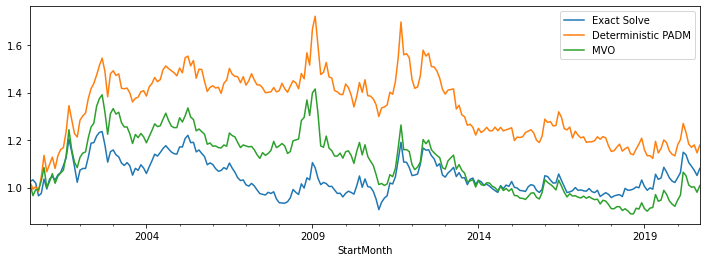

In [437]:
T = len(oot_returns_adm)
plt.figure(figsize = (12,4))
(wealth(oot_returns_svm.iloc[:T])/wealth(market_mvo.iloc[:T])).plot(label = 'Exact Solve');
(wealth(oot_returns_adm.iloc[:T])/wealth(market_mvo.iloc[:T])).plot(label = 'Deterministic PADM');
(wealth(oot_returns_mvo.iloc[:T])/wealth(market_mvo.iloc[:T])).plot(label = 'MVO');
plt.legend();
#(wealth(market_svm.iloc[:T])).plot(label = 'MVO');

In [438]:
oot_returns_adm.iloc[:T] - oot_returns_mvo.iloc[:T]

StartMonth
2000-07-01    0.009645
2000-08-01    0.019283
2000-09-01   -0.016150
2000-10-01   -0.018353
2000-11-01    0.022136
                ...   
2020-05-01   -0.003135
2020-06-01   -0.002157
2020-07-01    0.007647
2020-08-01   -0.005980
2020-09-01    0.000000
Length: 243, dtype: float64

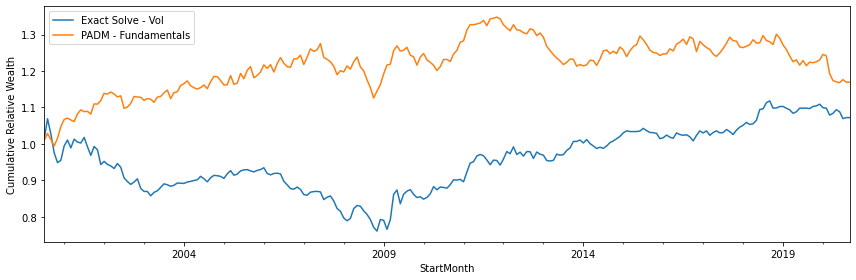

In [439]:
plt.figure(figsize = (12,4))
#(wealth(oot_returns_mvo.iloc[:T])/wealth(oot_returns_mvo.iloc[:T])).plot(label = 'MVO');
(wealth(oot_returns_svm.iloc[:T])/wealth(oot_returns_mvo.iloc[:T])).plot(label = 'Exact Solve - Vol');
(wealth(oot_returns_adm.iloc[:T])/wealth(oot_returns_mvo.iloc[:T])).plot(label = 'PADM - Fundamentals');
#(wealth(oot_returns_mvo.iloc[:T])/wealth(oot_returns_mvo.iloc[:T])).plot(label = 'MVO');
#wealth(rets.iloc[:,:N].max(axis=1)).plot(label = 'Max Possible');
plt.ylabel("Cumulative Relative Wealth")
plt.legend();
plt.tight_layout()
plt.savefig(pth+"SVM MVO/Images/p12"+turnover+".png", dpi = dpi_setting)

In [440]:
pd.DataFrame([RetStats(oot_returns_mvo), RetStats(oot_returns_svm), RetStats(oot_returns_adm)], index = ["MVO", "SVM MVO - Exact", "SVM MVO - ADM"], columns = ["$\mu$", "$\sigma$", "Sharpe Ratio"])

,$\mu$,$\sigma$,Sharpe Ratio
MVO,0.141941,0.123282,1.151354
SVM MVO - Exact,0.148542,0.146378,1.014782
SVM MVO - ADM,0.151041,0.132752,1.137772


In [441]:
print('mvo turnover proxy', weights_mvo.diff().abs().sum(axis = 1).sum())
print('svm turnover proxy', weights_svm.diff().abs().sum(axis = 1).sum())
print('adm turnover proxy', weights_adm.diff().abs().sum(axis = 1).sum())

mvo turnover proxy 30.250002543513443
svm turnover proxy 30.250003940481843
adm turnover proxy 30.25000420775103


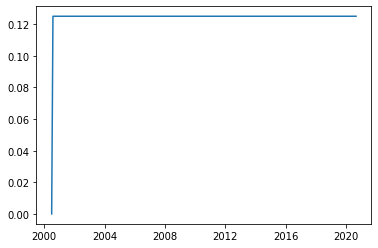

In [442]:
plt.plot(weights_adm.diff().abs().sum(axis = 1))

In [443]:
weights_svm.diff().abs().sum(axis = 1) #turnover limit respected

StartMonth
2000-07-01    0.000
2000-08-01    0.125
2000-09-01    0.125
2000-10-01    0.125
2000-11-01    0.125
              ...  
2020-05-01    0.125
2020-06-01    0.125
2020-07-01    0.125
2020-08-01    0.125
2020-09-01    0.125
Length: 243, dtype: float64

In [444]:
np.concatenate([wis_adm, np.expand_dims(bias_adm, axis = 1)], axis = 1).shape

(243, 4)

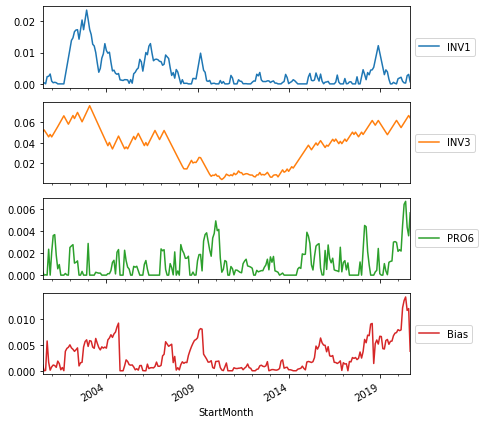

In [445]:
#out_3
#pd.DataFrame(wis_adm, index = weights_svm.index, columns = ['Vol', 'GRW7', 'PRO6', 'INV3', 'LEV5']).plot(subplots = True, legend = True, figsize = (6,9));
pd.DataFrame(np.concatenate([wis_adm, np.expand_dims(bias_adm, axis = 1)], axis = 1), index = weights_svm.index, 
             columns = ['INV1','INV3','PRO6', 'Bias']).plot(subplots = True, legend = True, figsize = (6,6));

for ax in plt.gcf().axes:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(pth+"SVM MVO/Images/p13"+turnover+".png", dpi = dpi_setting)

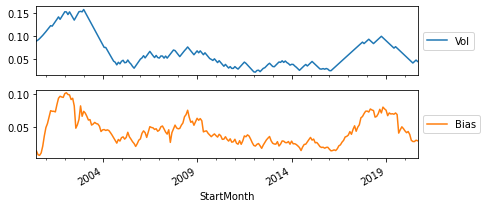

In [446]:
# df = pd.DataFrame(wis_svm, columns= wrds_svm.loc[:,"ROC1":"Vol"].columns, index = weights_svm.index)
# df.mean()
# #plt.legend(['INV3','LEV5']);
# df.ROC1.plot()
bias_svm2 = np.array([bias_svm[i][0] for i in range(len(bias_svm))])
pd.DataFrame(np.concatenate([wis_svm, np.expand_dims(bias_svm2, axis = 1)], axis = 1), index = weights_svm.index, 
             columns = ['Vol', 'Bias']).plot(subplots = True, legend = True, figsize = (6,3));

for ax in plt.gcf().axes:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(pth+"SVM MVO/Images/p14"+turnover+".png", dpi = dpi_setting)

In [406]:
bias_svm2 = np.array([bias_svm[i][0] for i in range(len(bias_svm))])